In [ ]:
!curl -O https://raw.githubusercontent.com/lmcanavals/3D-ORGAN/master/datasets/arq_dataset.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2747k  100 2747k    0     0  9283k      0 --:--:-- --:--:-- --:--:-- 9283k


In [ ]:
!tar xvzpf arq_dataset.tar.gz

custom_arq_dataset.npy


In [ ]:
!pip3 install numpy-stl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from stl import mesh
import matplotlib.pyplot as plt

In [ ]:
data = np.load('custom_arq_dataset.npy', allow_pickle=True).item()

In [ ]:
x_train = data['train']['data']
labels, y_train = np.unique(data['train']['labels'], return_inverse=True)
x_test = data['test']['data']
_, y_test = np.unique(data['test']['labels'], return_inverse=True)

In [ ]:
print(labels)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

['arq' 'bathtub' 'bed' 'chair' 'desk' 'dresser' 'monitor' 'night_stand'
 'sofa' 'table' 'toilet']
(4923, 32, 32, 32) (4923,)
(1127, 32, 32, 32) (1127,)


In [ ]:
!pip install noise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import noise

In [ ]:
def generate_perlin_noise_3d(shape, scale=32.0, octaves=6, persistence=0.5, lacunarity=2.0, seed=0):
    noise_array = np.zeros(shape)

    for i in range(shape[0]):
        for j in range(shape[1]):
            for k in range(shape[2]):
                noise_array[i][j][k] = noise.pnoise3(i / scale, j / scale, k / scale,
                                                    octaves=octaves,
                                                    persistence=persistence,
                                                    lacunarity=lacunarity,
                                                    repeatx=1024,
                                                    repeaty=1024,
                                                    repeatz=1024,
                                                    base=seed)
    return noise_array

In [ ]:
noise_array = generate_perlin_noise_3d([32,32,32], scale=32.0, octaves=2, persistence=0.5, lacunarity=2.0, seed=2)


In [ ]:
def make_hole(hole, fill):
  m,n,o = hole.shape
  for i in range(m):
    for j in range(n):
      for k in range(o):
        if noise_array[i, j, k] > 0:
          if hole[i, j, k]:
            hole[i, j, k] = False
            fill[i,j,k] = True
          else:
            hole[i, j, k] = False

In [ ]:
idx = 300
voxel = x_train[idx].copy()
print(type(voxel))

<class 'numpy.ndarray'>


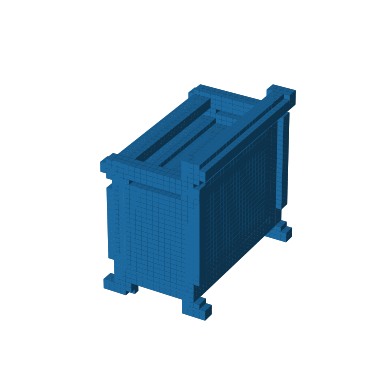

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxel)
plt.axis("off")
plt.show()

In [ ]:
voxel_hole = voxel.copy()
voxel_fill = np.full_like(voxel, False)
make_hole(voxel_hole, voxel_fill)

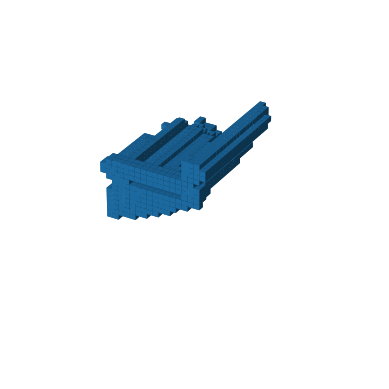

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxel_hole)
plt.axis("off")
plt.show()

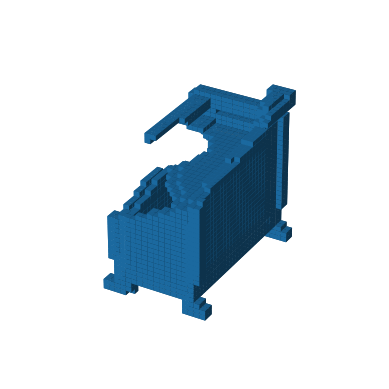

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxel_fill)
plt.axis("off")
plt.show()

In [ ]:
!pip install -U voxelfuse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U quad_mesh_simplify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ante el error en:

    from quad_mesh_simplify import simplify_mesh

reemplazar por:

    from simplify import simplify_mesh

En el propio archivo mismo en:

    /usr/local/lib/python3.10/dist-packages/voxelfuse/mesh.py

In [ ]:
from voxelfuse.voxel_model import VoxelModel
from voxelfuse.mesh import Mesh
from voxelfuse.primitives import generateMaterials

In [ ]:
model_hole = VoxelModel(voxel_hole, generateMaterials(4))  #4 is aluminium.
mesh_hole = Mesh.fromVoxelModel(model_hole)
mesh_hole.export('mesh_hole.stl')


Meshing: 100%|██████████| 1087/1087 [00:00<00:00, 2898.08it/s]


In [ ]:
model_fill = VoxelModel(voxel_fill, generateMaterials(4))  #4 is aluminium.
mesh_fill = Mesh.fromVoxelModel(model_fill)
mesh_fill.export('mesh_fill.stl')


Meshing: 100%|██████████| 3593/3593 [00:01<00:00, 2806.74it/s]


In [ ]:
!pwd



/content
